# Purpose:

2015-01-02

- Plot results from `plink`-based LD analysis to help visualize possible areas of interest. 
- should probably cross-reference areas identified using `hapFLK` by Andrea as well.

# Implementation:

## Imports:

In [1]:
# plotting imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
# import tables as h5

## File paths:

In [3]:
# define paths to files
ld_table = "/home/gus/remote_mounts/louise/data/genomes/glossina_fuscipes/annotations/SNPs/plink_out/tsetseFINAL_14Oct2014_f2_53.recode.renamed_scaffolds.vcf/ld/r_none_freqs.ld"

LD_22 = "/home/gus/remote_mounts/louise/data/dummy_datasets/linkage_diseq/hapmap/ld_chr22_MEX.txt"

In [4]:
ld = pd.read_table(ld_table, sep=" +")

/home/gus/.virtualenvs/py279/lib/python2.7/site-packages/pandas/io/parsers.py:639: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  ParserWarning)


In [5]:
ld.head()

,CHR_A,BP_A,SNP_A,MAF_A,CHR_B,BP_B,SNP_B,MAF_B,R
0,Scaffold0,11692,.,0.019608,Scaffold0,13388,.,0.278846,-0.090229
1,Scaffold0,11692,.,0.019608,Scaffold0,23159,.,0.000000,NaN
2,Scaffold0,11692,.,0.019608,Scaffold0,23196,.,0.019231,-0.020408
3,Scaffold0,11692,.,0.019608,Scaffold0,23408,.,0.298077,-0.092429
4,Scaffold0,11692,.,0.019608,Scaffold0,23418,.,0.298077,-0.092429


# Basic Descriptive Plots:

### LD as r for Scaffold0:

In [6]:
scaffold0 = ld[ld.CHR_A == 'Scaffold0']

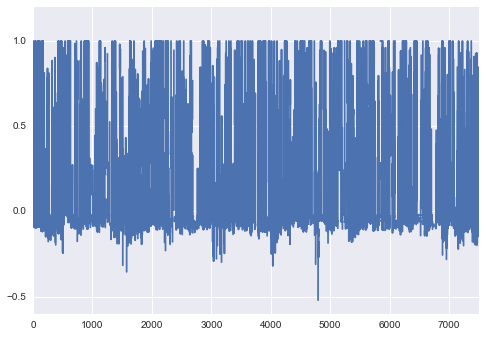

In [7]:
scaffold0.R.plot()

In [8]:
# plt.boxplot(scaffold0.R);
# sns.boxplot(scaffold0.R);
# sns.violinplot(.R);
scaffold0[scaffold0.R != np.nan].head()

,CHR_A,BP_A,SNP_A,MAF_A,CHR_B,BP_B,SNP_B,MAF_B,R
0,Scaffold0,11692,.,0.019608,Scaffold0,13388,.,0.278846,-0.090229
1,Scaffold0,11692,.,0.019608,Scaffold0,23159,.,0.000000,NaN
2,Scaffold0,11692,.,0.019608,Scaffold0,23196,.,0.019231,-0.020408
3,Scaffold0,11692,.,0.019608,Scaffold0,23408,.,0.298077,-0.092429
4,Scaffold0,11692,.,0.019608,Scaffold0,23418,.,0.298077,-0.092429


### LD ($r$) vs distance in bp for Scaffold0

In [9]:
bp = abs(scaffold0.BP_A - scaffold0.BP_B)

In [10]:
bp.head()

0     1696
1    11467
2    11504
3    11716
4    11726
dtype: int64

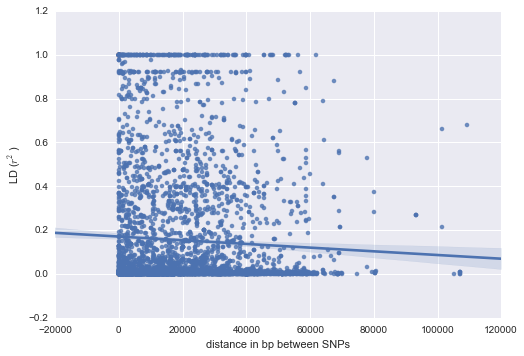

In [58]:
sns.regplot(bp, scaffold0.R**2);
plt.xlabel('distance in bp between SNPs')
plt.ylabel(r'LD ($r^2$)')
# plt.semilogx()

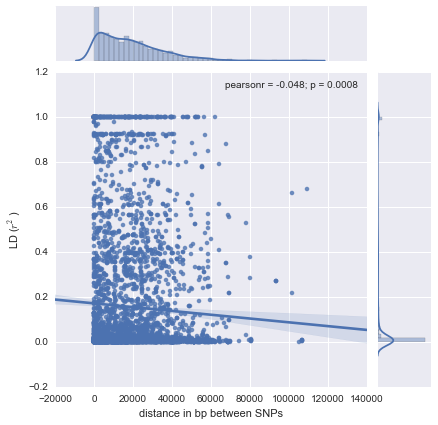

In [59]:
sns.jointplot(bp, scaffold0.R**2, kind='reg');
plt.xlabel('distance in bp between SNPs')
plt.ylabel(r'LD ($r^2$)')

#### We might need to figure out how evenly our SNPs are distributed on the Contig...

In [12]:
snp_locs = list(set(scaffold0.BP_A))

In [13]:
snp_locs[:5]

[2584578, 1779717, 206854, 1314828, 2584589]

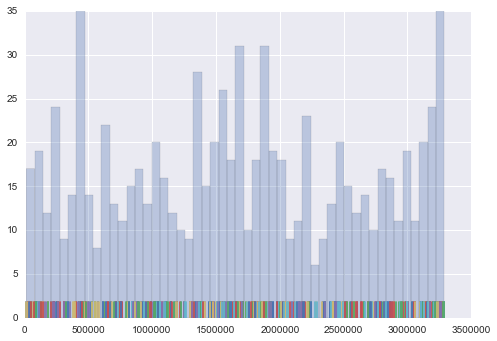

In [14]:
plt.hist(snp_locs, bins=50, alpha=0.3)
sns.rugplot(snp_locs);

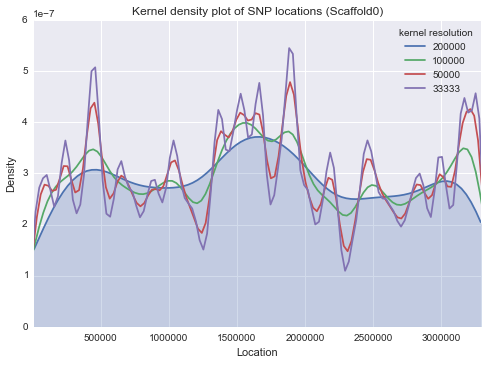

In [39]:
# %matplotlib 
bw = 200000
sns.kdeplot(np.array(snp_locs), shade=1, bw=bw, label=bw);
sns.kdeplot(np.array(snp_locs), shade=0, bw=bw/2, label=bw/2);
sns.kdeplot(np.array(snp_locs), shade=0, bw=bw/4, label=bw/4);
sns.kdeplot(np.array(snp_locs), shade=0, bw=bw/6, label=bw/6);
# sns.kdeplot(np.array(snp_locs), shade=0, bw=bw/20, label=bw/20);
# sns.rugplot(snp_locs)
plt.title('Kernel density plot of SNP locations (Scaffold0)')
plt.ylabel('Density')
plt.xlabel('Location')
plt.xlim(xmin=min(snp_locs), xmax=max(snp_locs));
plt.legend(title="kernel resolution");

## Lets try some other pre-existing LD data
The following data was obatined from the [HapMap](http://hapmap.ncbi.nlm.nih.gov/downloads/index.html.en) site.
Specifically, I am using the `ld_chr22_MEX.txt` file from 2009.

In [18]:
# these header values are INFERED from the text of the site but are NOT
# named in the file....
#  D', LOD , R2 
ld_22_headers = ['BP_A', 'BP_B', 'POPULATION', 'SNP_A', 'SNP_B', 'D_PRIME', 'LOD', 'R2', 'INDIVIDUALS_MAYBE'] 
ld_22 = pd.read_table(LD_22, header=None, names=ld_22_headers, sep=' +')

In [19]:
ld_22.head()

,BP_A,BP_B,POPULATION,SNP_A,SNP_B,D_PRIME,LOD,R2,INDIVIDUALS_MAYBE
0,14430353,14441016,MEX,rs2334386,rs9617528,1.000,0.007,0.25,144
1,14430353,14564328,MEX,rs2334386,rs7288972,1.000,0.007,0.25,144
2,14441016,14564328,MEX,rs9617528,rs7288972,0.042,0.002,0.03,144
3,14441016,14632540,MEX,rs9617528,rs9604698,1.000,0.003,0.13,144
4,14564328,14632540,MEX,rs7288972,rs9604698,1.000,0.003,0.13,145


In [20]:
ld_22_locs = list(set(ld_22.BP_A))

In [21]:
len(ld_22_locs)

19688

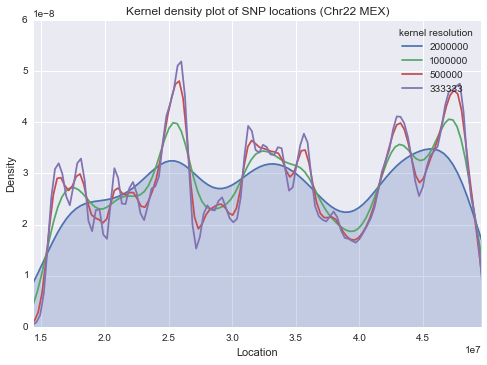

In [38]:
bw = 2000000
sns.kdeplot(np.array(ld_22_locs), shade=1, bw=bw, label=bw);
sns.kdeplot(np.array(ld_22_locs), shade=0, bw=bw/2, label=bw/2);
sns.kdeplot(np.array(ld_22_locs), shade=0, bw=bw/4, label=bw/4);
sns.kdeplot(np.array(ld_22_locs), shade=0, bw=bw/6, label=bw/6);
# sns.kdeplot(np.array(ld_22_locs), shade=0, bw=bw/20, label=bw/20);
# sns.rugplot(ld_22_locs)
plt.title('Kernel density plot of SNP locations (Chr22 MEX)')
plt.ylabel('Density')
plt.xlabel('Location')
plt.xlim(xmin=min(ld_22_locs), xmax=max(ld_22_locs));
plt.legend(title="kernel resolution");

In [41]:
bp22 = abs(ld_22.BP_A - ld_22.BP_B)
bp22.head()

0     10663
1    133975
2    123312
3    191524
4     68212
dtype: int64

In [49]:
# abs(len(bp22[0::3])-len(bp22))

1716296

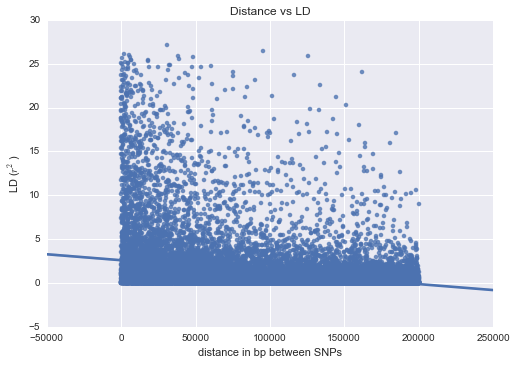

In [56]:
sns.regplot(bp22[::100], ld_22.R2[::100]);
plt.title('Distance vs LD');
plt.xlabel('distance in bp between SNPs');
plt.ylabel(r'LD ($r^2$)');

In [45]:
ld_22.R2.head()

0    0.25
1    0.25
2    0.03
3    0.13
4    0.13
Name: R2, dtype: float64

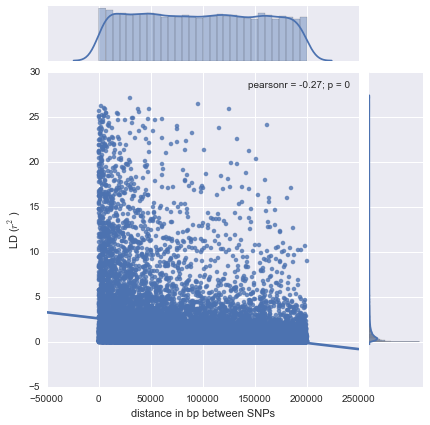

In [55]:
sns.jointplot(bp22[::100], ld_22.R2[::100], kind="reg",);
plt.xlabel('distance in bp between SNPs')
plt.ylabel(r'LD ($r^2$)')